In [1]:
#
# Process-- we are going to first make a script that can convert from a given source DXF into 
# a DXF-AAMA file with just those blocks and entities selected and ordered
#
# Should be able to send these files to the cutter as-is for verification (and potentially their layout)
#
# Subsequent process to pull these files in and reposition them ourselves with a combined new layout
#

In [7]:
# Inputs for converting a single file
inputfilename = "../dxffiles/P-E-13,5-BS-Master-09.dxf"
outputfilename = "../dxffiles/BSF-PUMA.dxf"

cutlayers, penlayers = ["BSF-CUT-BOTH"], ['BSF-PLOT-PUMA']
cutlayers, penlayers = ["BSR-CUT-PUMA"], ['BSR-PLOT-PUMA']

import ezdxf
d = ezdxf.readfile(inputfilename)
print("layerspresent:", set(e.dxf.layer for e in d.entities))

layerspresent: {'BSF-CUT-BOTH', 'BSR-CUT-EVO', 'BSM-CUT-BOTH', 'BSM-PLOT-EVO', 'BSR-PLOT-PUMA', 'PATCH-OUTSIDE', 'PATCH-MYLAR', 'BSR-CUT-PUMA', 'CONSTRUCTION', 'BSF-PLOT-PUMA', 'BSM-PLOT-PUMA', 'SPLINES-MASTER', 'PATCH-INSIDE', 'BSF-PLOT-EVO', 'PATCH-REF', 'BSR-PLOT-EVO', 'PUMA-REF', 'HISTORY'}


In [8]:
import ezdxf
from dxfgrouping import filterlayerelements, makemergevertset, linearizeelement

cutelements = filterlayerelements(d, cutlayers)
penelements = filterlayerelements(d, penlayers)


Unknown type


TypeError: 'NoneType' object is not iterable

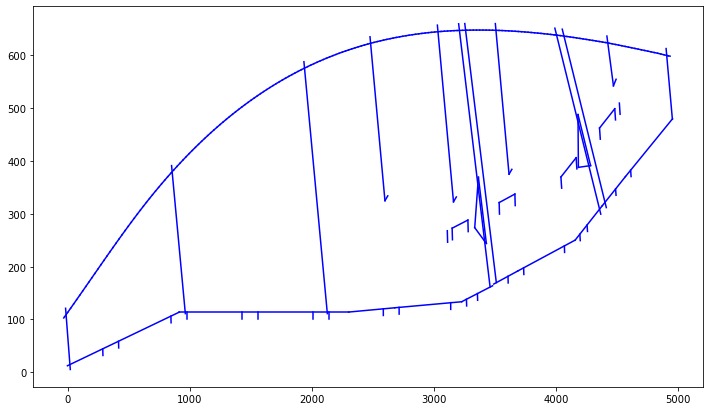

In [9]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.figure(figsize=(12,7))
for es, c in [(penelements, "blue"), (cutelements, "red")]:
    for e in es:
        ps = linearizeelement(e)
        plt.plot([p.x  for p in ps], [p.y  for p in ps], color=c)


dmaxs-tail:  [1.1405005538094386e-11, 2.4907745920000823e-06, 0.008621551945588354]
vertdegs: [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]


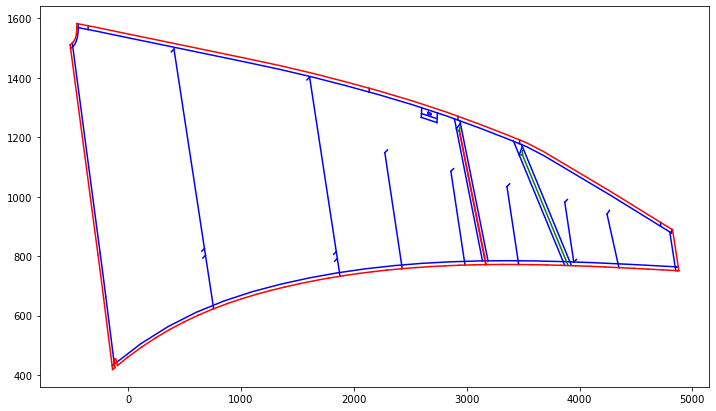

In [4]:
from dxfgrouping import getblockcomponent, dxfoutputblocks

res = getblockcomponent(cutelements, penelements, 0.999)
(outercutelements, outercutelementsdir) = res[0]
(internalcutelements, internalpenelements) = res[1]
(remainingcutelements, remainingpenelements) = res[2]

if remainingcutelements:
    res1 = getblockcomponents(remainingcutelements, remainingpenelements, 0.999)
    print("second component:", res1)
    
plt.figure(figsize=(12,7))
for es, c in [(penelements, "blue"), (outercutelements, "red"), (internalcutelements, "green")]:
    for e in es:
        ps = linearizeelement(e)
        plt.plot([p.x  for p in ps], [p.y  for p in ps], color=c)


In [5]:

elementgroups = [ (outercutelements, outercutelementsdir, internalcutelements, internalpenelements) ]
dxfoutputblocks("../dxffiles/aamaout/BSF-PUMA.dxf", elementgroups)
